In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [65]:
# Commented out IPython magic to ensure Python compatibility.
#importing all the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
# %matplotlib inline
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [66]:
#Please select a file
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


UB ID: 50442207

Name: Akhil Katha

Colab link: https://colab.research.google.com/drive/14IOmPzMIOOFn-u5GmJWrQtIgYL3cXZ9N?usp=sharing


# Prediction of Heart Disease using Backpropagation Neural Network

In [67]:
df=pd.read_csv('heart.csv')
df.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [68]:
df.shape

(1025, 14)

In [69]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [70]:
df.isnull().sum()#no null values present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [71]:
df.target.value_counts() #no class imbalance

1    526
0    499
Name: target, dtype: int64

In [72]:
type(df)

pandas.core.frame.DataFrame

In [73]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


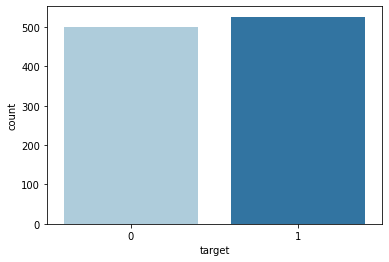

In [74]:
#Target Distribution
sns.countplot(x="target", data=df)
plt.show()   #no class imbalance

In [75]:
#checking the percent of people having no disease 
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients that don't have heart disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of patients that have heart disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of patients that don't have heart disease: 48.68%
Percentage of patients that have heart disease: 51.32%


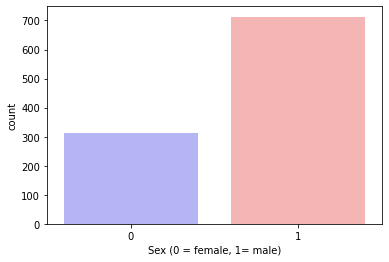

In [76]:
#Gender distribution
sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [77]:
#checking the percent of gender
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of females: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of males: {:.2f}%".format((countMale / (len(df.sex))*100)))
#looks like males are more than twice the number of females

Percentage of females: 30.44%
Percentage of males: 69.56%


In [78]:
df.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.569138  0.827655  0.482966  134.106212  251.292585  0.164329   
1       52.408745  0.570342  1.378327  129.245247  240.979087  0.134981   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.456914  139.130261  0.549098  1.600200  1.166333  1.158317  2.539078  
1       0.598859  158.585551  0.134981  0.569962  1.593156  0.370722  2.119772

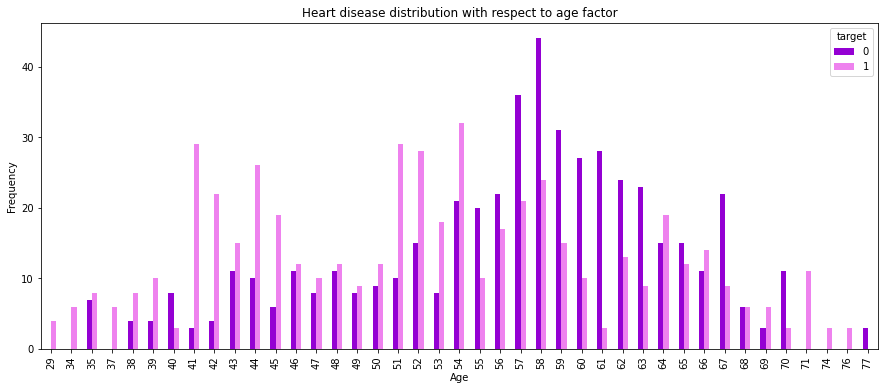

In [79]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6),color=['darkviolet','violet' ])
plt.title('Heart disease distribution with respect to age factor')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()
#54 age seems like the most common age for having heart disease followed by 51,52 and 41

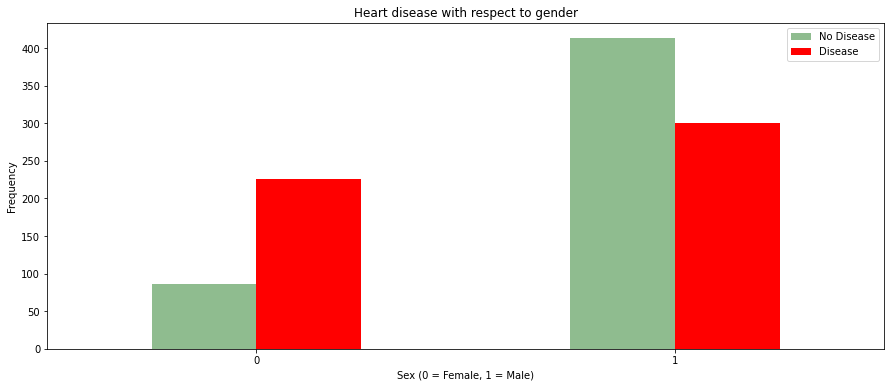

In [80]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['darkseagreen','red' ])
plt.title('Heart disease with respect to gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()
#Looks like majority of the patients having disease are Males

Text(0.5, 1.0, 'Heart disease with respect to gender')

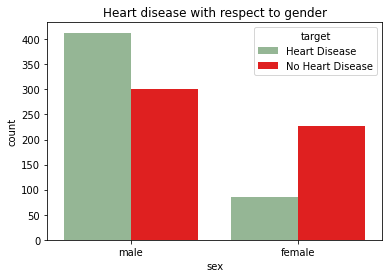

In [81]:
plt.show()
#Looks like majority of the patients having disease are Males

type(df['target'])

df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

sns.countplot(data= df2, x='sex',hue='target', palette=['darkseagreen','red' ])
plt.title('Heart disease with respect to gender')

Text(0.5, 1.0, 'Chest pain type with respect to target')

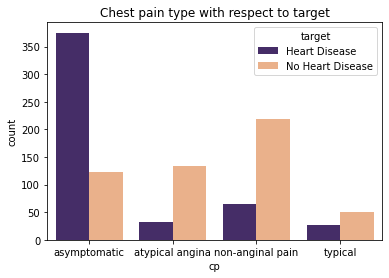

In [82]:
#Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic
def chng3(cp):
    if cp == 0:
        return 'asymptomatic'
    elif cp == 1:
        return 'atypical angina'
    elif cp == 2:
        return 'non-anginal pain'
    else:
        return 'typical'
df2['cp'] = df2['cp'].apply(chng3)

sns.countplot(data= df2, x='cp',hue='target',palette=['#432371',"#FAAE7B"])
plt.title('Chest pain type with respect to target')

Most of the heart disease patients have asymptomatic chest pain which also means that the symptoms are silent.

So in case the patient has heart disease, they wouldn lack the intensity of a classic heart attack such as extreme chest pain and pressue, stabbing pain in the arm, neck, or jaw, sudden shortness of breath, sweating, and dizziness.

lets check other factors:
The only way to tell If you had asymptomatic attack is by an electrocardiogram or echocardiogram.
These tests can reveal changes that signal a heart attack.

Text(0.5, 1.0, 'Chest pain type with respect to target')

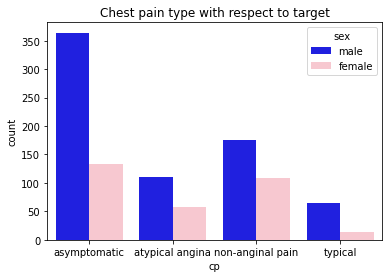

In [83]:
#lets check the same with respect to gender
sns.countplot(data= df2, x='cp',hue='sex',palette=['blue',"pink"])
plt.title('Chest pain type with respect to target')

Looks like males have more asymptomatic chest pain when compared to females. Females mostly exhibit aysymptomatic and non-anginal chest pains. Non anginal pains can actually exhibit pain symptoms behind the breast bone

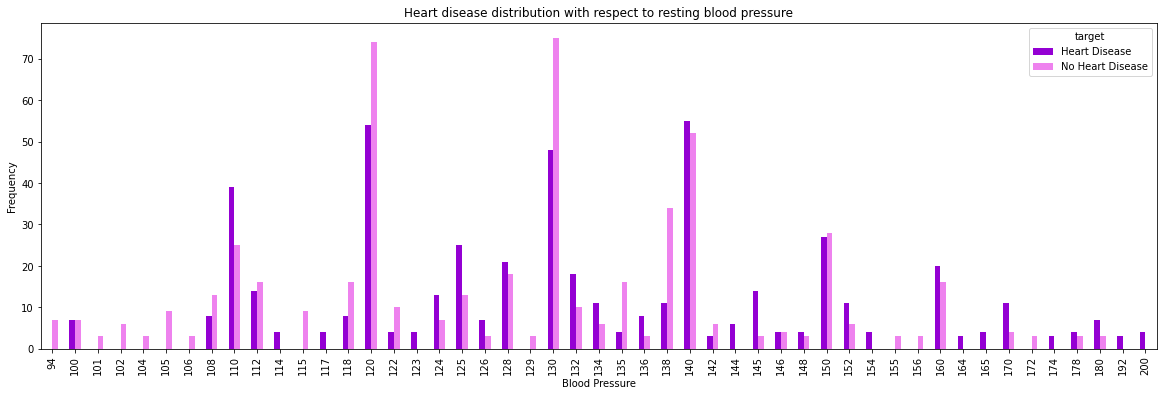

In [84]:
pd.crosstab(df2.trestbps,df2.target).plot(kind="bar",figsize=(20,6),color=['darkviolet','violet' ])
plt.title('Heart disease distribution with respect to resting blood pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

Blood Pressure of 120, 130 and 140 seem to contribute to heart diseases. Its hard to say because this is resting blood pressure

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation of resting blood pressure with target')

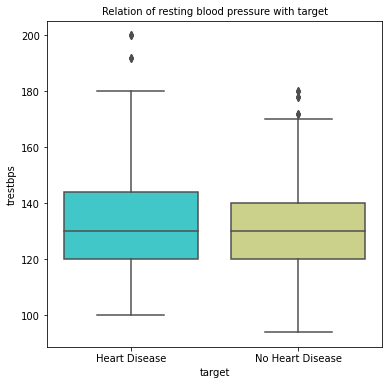

In [85]:
#lets use a better visualization
plt.figure(figsize=(6,6))
sns.boxplot(df2['target'], df2['trestbps'], palette = 'rainbow')
plt.title('Relation of resting blood pressure with target', fontsize = 10)

The plot clearly suggests that the patients who are most likely to not suffer 
from the disease have a slighly lower blood pressure than the patients who have heart diseases.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cholestrol with respect to target')

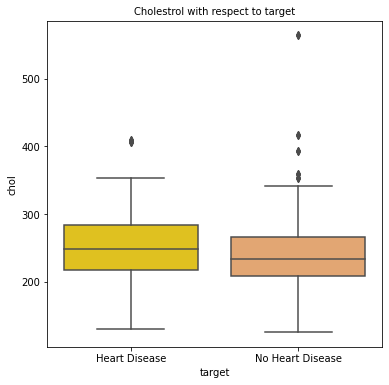

In [86]:
#lets see how cholestrol impacts
plt.figure(figsize=(6,6))
sns.boxplot(df2['target'], df2['chol'], palette=['gold','sandybrown'])
plt.title('Cholestrol with respect to target', fontsize = 10)

In general, low LDL levels and high HDL cholesterol levels are good for heart health.
A healthy heart has a total cholestrol levels of less than 200mg/dl
whereas at risk is considered as 200-239 and dangeours is considered as 240 and higher.
source: https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

Text(0.5, 1.0, 'Cholestrol with respect to target')

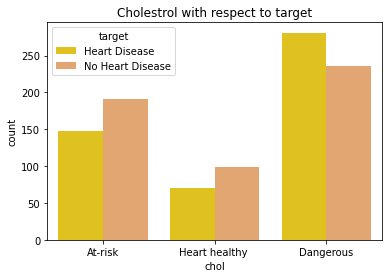

In [87]:
def chng4(chol):
    if chol < 200:
        return 'Heart healthy '
    elif chol >= 200 and chol <= 239 :
        return 'At-risk'
    else:
        return 'Dangerous'

df2['chol'] = df2['chol'].apply(chng4)

#lets check the same with respect to gender
sns.countplot(data= df2, x='chol',hue='target',palette=['gold',"sandybrown"])
plt.title('Cholestrol with respect to target')


Most of the heart disease patients have dangerous levels of cholestrol followed by at-risk.
Looks like this is one of the significant factors in determing a heart disease

Text(0.5, 1.0, 'Age distribution of Heart Disease Patients\n')

<Figure size 432x432 with 0 Axes>

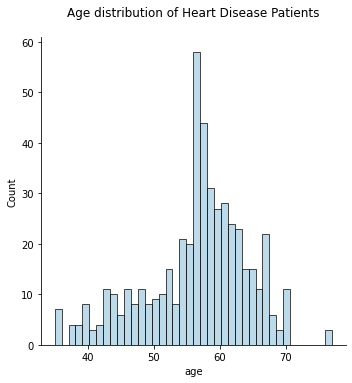

In [88]:
#lets check in depth with respect to age
plt.figure(figsize=(6,6))
sns.displot(df2[df2['target']=='Heart Disease']['age'],kde=False,bins=40)
plt.title('Age distribution of Heart Disease Patients\n')

Heart Disease seems like a very common disease in the age above 60 and common among adults which belong to the age group of 41 to 60. 
But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.

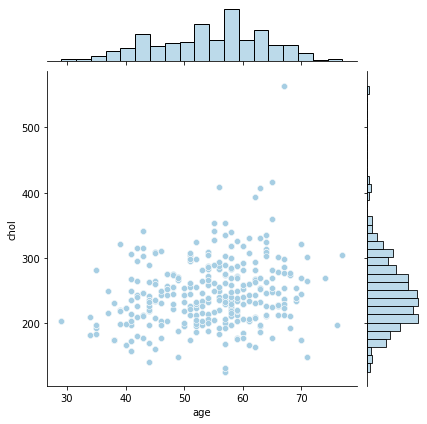

In [89]:
sns.jointplot(data=df, x="age", y="chol")

Text(0.5, 1.0, 'Fasting blood sugar with respect to target')

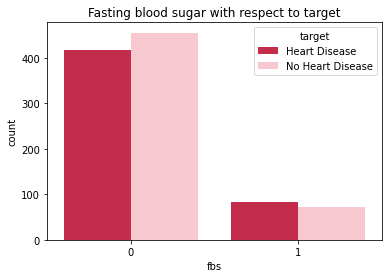

In [90]:
#fasting blood sugar
sns.countplot(data= df2, x='fbs',hue='target',palette=['crimson',"pink"])
plt.title('Fasting blood sugar with respect to target')

Looks like blood sugar level for most of the heart disease patients is less than 120.
>Greater than 120 is 1 otherwise 0

In [91]:
df2.head()

age     sex            cp  trestbps            chol  fbs  restecg  thalach  \
0   52    male  asymptomatic       125         At-risk    0        1      168   
1   53    male  asymptomatic       140         At-risk    1        0      155   
2   70    male  asymptomatic       145  Heart healthy     0        1      125   
3   61    male  asymptomatic       148         At-risk    0        1      161   
4   62  female  asymptomatic       138       Dangerous    1        1      106   

   exang  oldpeak  slope  ca  thal         target  
0      0      1.0      2   2     3  Heart Disease  
1      1      3.1      0   0     3  Heart Disease  
2      1      2.6      0   0     3  Heart Disease  
3      0      0.0      2   1     3  Heart Disease  
4      0      1.9      1   3     2  Heart Disease

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'FastingBS <= 120 mg/dl (Combined)')

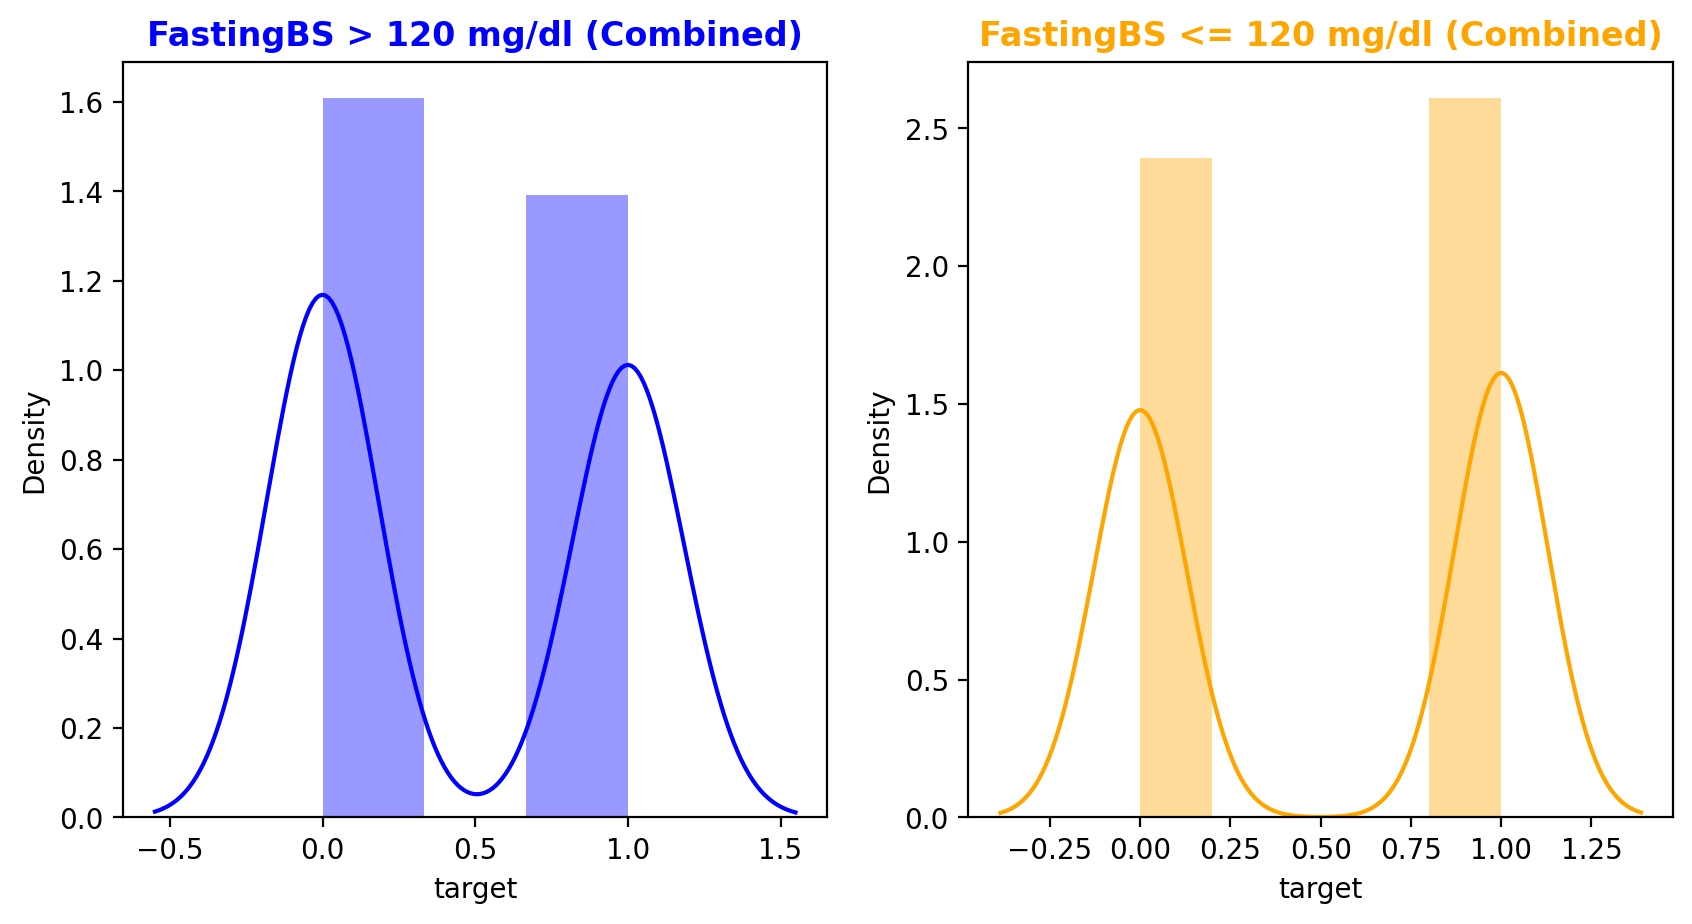

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), dpi=200)
sns.distplot(df[df["fbs"] == 1]["target"], ax=ax1, color="blue")
sns.distplot(df[df["fbs"] == 0]["target"], ax=ax2, color="orange")
ax1.set_title("FastingBS > 120 mg/dl (Combined)", fontweight="bold", color="blue")
ax2.set_title("FastingBS <= 120 mg/dl (Combined)", fontweight="bold", color="orange")

No particular interesting insight to check if fasting blood sugar levels impact heart diease but you can notice if blood sugar is low(<=120), that contributes to heart disease'''

Lets check with respect to resting ecg.

Text(0.5, 1.0, 'Resting ECG with respect to Target')

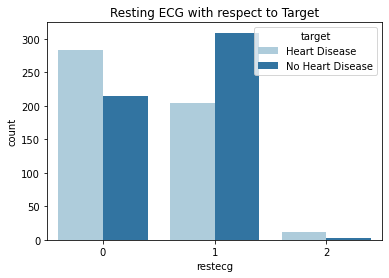

In [93]:
sns.set_palette("Paired")
sns.countplot(data= df2, x='restecg',hue='target')
plt.title('Resting ECG with respect to Target')

Resting 12-lead electrocardiography (ECG) is a non-invasive test that can detect abnormalities 
including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.
>In our case, level 0 means normal, level 1 means ST-T wave abnormality and level 2 means definite left ventricular hypertrophy

Looks like most of the heart disease patients have either normal ECG or some ST-T wave abnormality. So it seems like ECG is not the sole factor in estimating if a person has heart disease

Text(0.5, 1.0, 'Exercise induced angina with respect to ST depression')

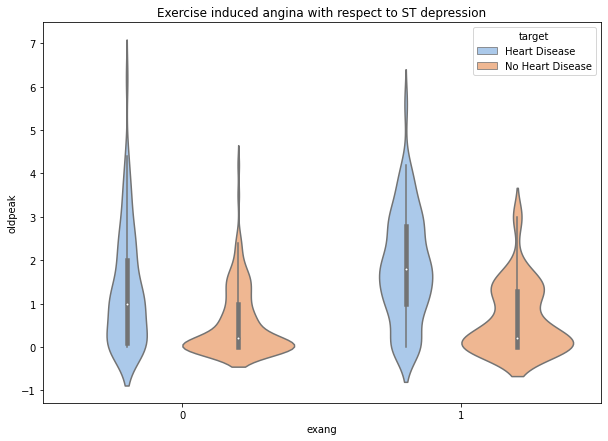

In [94]:
plt.figure(figsize=(10,7))
sns.set_palette("pastel")
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target').set_title("Exercise induced angina with respect to ST depression")

Text(0.5, 1.0, 'Exercise induced angina with respect to gender')

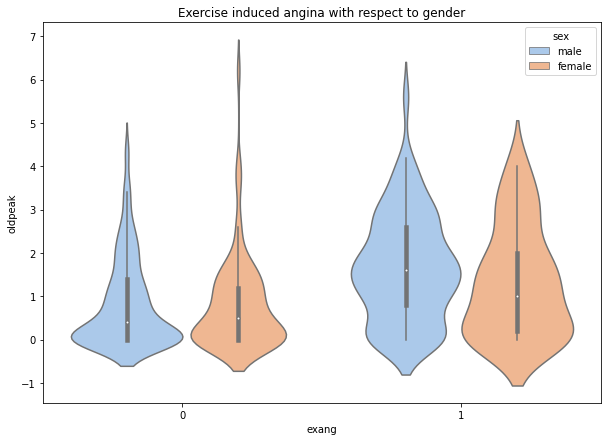

In [95]:
plt.figure(figsize=(10,7))
sns.set_palette("pastel")
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='sex').set_title("Exercise induced angina with respect to gender")

From the graph it looks like its more for males 

Text(0.5, 1.0, 'Heart rate with respect to exercise segment')

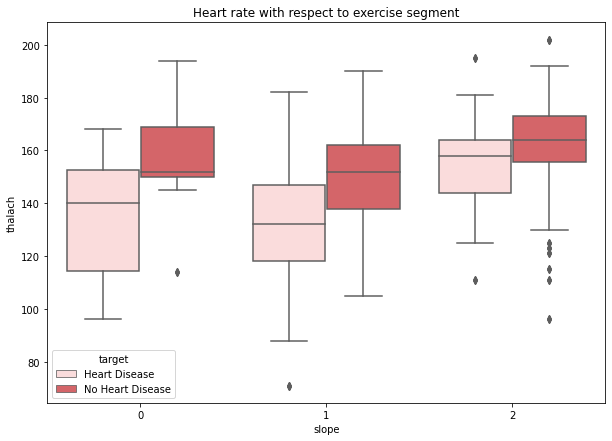

In [96]:
#checking exercise segment 
#thalach is maximum heart rate
#the slope of the peak exericse ST segment, 0:unsloping, 1: flat, 2: downsloping
#ST segment depression (horizontal or downsloping) is the most reliable indicator of exercise-induced ischaemia
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target', palette =['#FFD7D7','#E75258']).set_title("Heart rate with respect to exercise segment")

Looks like for most of the heart disease patients, the ST segment is either flat or downsloping. Need to check slope with respect to exang as its a good way to diagnose heart diseases

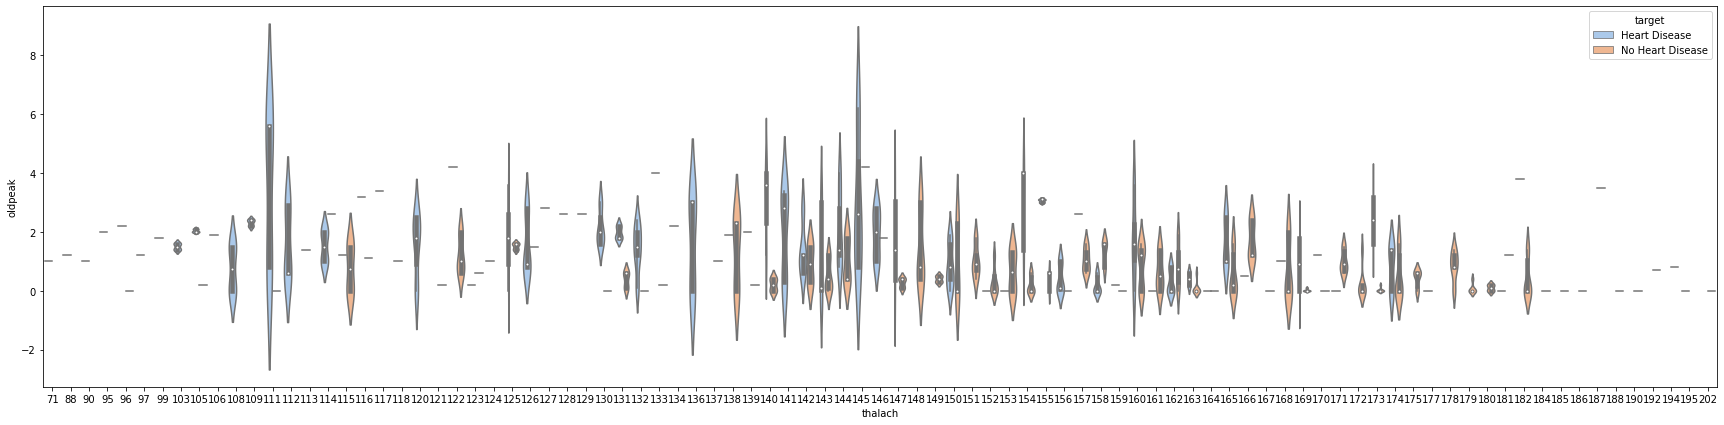

In [97]:
plt.figure(figsize=(30,7))
sns.color_palette("bright")
sns.violinplot(data=df2,x='thalach',y='oldpeak',hue='target')

In [98]:
df2.head()

age     sex            cp  trestbps            chol  fbs  restecg  thalach  \
0   52    male  asymptomatic       125         At-risk    0        1      168   
1   53    male  asymptomatic       140         At-risk    1        0      155   
2   70    male  asymptomatic       145  Heart healthy     0        1      125   
3   61    male  asymptomatic       148         At-risk    0        1      161   
4   62  female  asymptomatic       138       Dangerous    1        1      106   

   exang  oldpeak  slope  ca  thal         target  
0      0      1.0      2   2     3  Heart Disease  
1      1      3.1      0   0     3  Heart Disease  
2      1      2.6      0   0     3  Heart Disease  
3      0      0.0      2   1     3  Heart Disease  
4      0      1.9      1   3     2  Heart Disease

Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen. Thalassemia can cause anemia leaving the patient fatiuged. Thalassema major leads to heart failure and liver problems. 

Lets check how thalassemia is in relation to target.

thal :Results of the blood flow observed via the radioactive dye.

Value 0: NULL (dropped from the dataset previously)
, Value 1: fixed defect (no blood flow in some part of the heart)
, Value 2: normal blood flow
, Value 3: reversible defect (a blood flow is observed but it is not normal)
.This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.

Text(0.5, 1.0, 'Thalassemia in target')

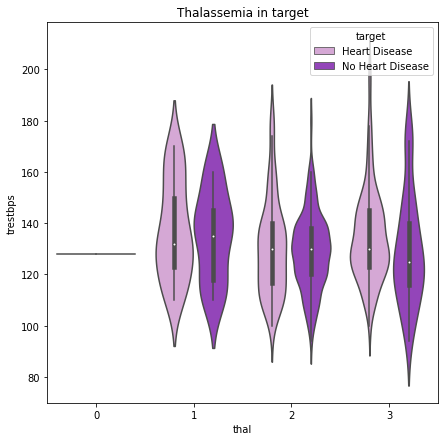

In [99]:
plt.figure(figsize=(7,7))
sns.violinplot(data=df2,x='thal',y='trestbps',hue='target',palette=['plum','darkorchid']).set_title("Thalassemia in target")

So patients with thalasemmia of reversible defect have blood pressure(notice >120) which could be possible reasons for heart disease and notice the one in fixed defect too (value 1), they seem the have bp higher than 120 as well.

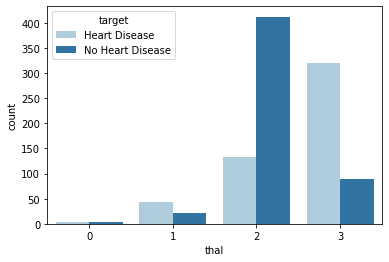

In [100]:
sns.set_palette("Paired")
sns.countplot(data= df2, x='thal',hue='target') # abnormal levels of thalassemia indicate heart disease

-------------------- Backpropagation ------------------------

In order to start, we need to have some numbers to work which are the initial weights, the biases, and training inputs/outputs.

Backpropogation is an algorithm for determining how a single training example would like to nudge the weights and biases in terms of relative proportions to those changes that cost the most rapid decrease to the costs.

when training an artificial neural netwrok, we pass data into our model. the way this data flows through the model is via forward propogation where we are repeatedly calculating the weight sum of the previous layers activation output with the corresponding weights and then passing this sum to the next layers activation function. 

We do this until we reach the output layer and at this point we calculate loss on our output and then gradient descent works to minimize this loss gradient descent does this minimization process by first calculating the gradient of the loss function with respect to the weights and then updating the weights in the network accordingly. To do the actual calculation, gradient descent uses backpropogation


In [101]:
df.head()

df3 = df.copy()

In [102]:
#creating dummy variables
chest_pain=pd.get_dummies(df3['cp'],prefix='cp',drop_first=True)
df3=pd.concat([df3,chest_pain],axis=1)
df3.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df3['slope'],prefix='slope')
th=pd.get_dummies(df3['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df3['restecg'],prefix='restecg')
frames=[df3,sp,th,rest_ecg]
df3=pd.concat(frames,axis=1)
df3.drop(['slope','thal','restecg'],axis=1,inplace=True)

df3.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  ...  \
0   52    1       125   212    0      168      0      1.0   2       0  ...   
1   53    1       140   203    1      155      1      3.1   0       0  ...   
2   70    1       145   174    0      125      1      2.6   0       0  ...   
3   61    1       148   203    0      161      0      0.0   1       0  ...   
4   62    0       138   294    1      106      0      1.9   3       0  ...   

   slope_0  slope_1  slope_2  thal_0  thal_1  thal_2  thal_3  restecg_0  \
0        0        0        1       0       0       0       1          0   
1        1        0        0       0       0       0       1          1   
2        1        0        0       0       0       0       1          0   
3        0        0        1       0       0       0       1          0   
4        0        1        0       0       0       1       0          0   

   restecg_1  restecg_2  
0          1          0  
1          0          0  
2          1          0  
3          1          0  
4          1          0  

[5 rows x 23 columns]

In [103]:
x=df3.columns.get_loc('target')
x


9

"""Creating training and testing test"""

In [104]:

X = df3.drop(['target'], axis = 1)
y = df3.target.values

X.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  cp_1  ...  \
0   52    1       125   212    0      168      0      1.0   2     0  ...   
1   53    1       140   203    1      155      1      3.1   0     0  ...   
2   70    1       145   174    0      125      1      2.6   0     0  ...   
3   61    1       148   203    0      161      0      0.0   1     0  ...   
4   62    0       138   294    1      106      0      1.9   3     0  ...   

   slope_0  slope_1  slope_2  thal_0  thal_1  thal_2  thal_3  restecg_0  \
0        0        0        1       0       0       0       1          0   
1        1        0        0       0       0       0       1          1   
2        1        0        0       0       0       0       1          0   
3        0        0        1       0       0       0       1          0   
4        0        1        0       0       0       1       0          0   

   restecg_1  restecg_2  
0          1          0  
1          0          0  
2          1          0  
3          1          0  
4          1          0  

[5 rows x 22 columns]

In [105]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings


In [106]:
from sklearn.model_selection import train_test_split

#split the data into train and test
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

In [107]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
#building the model
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 22, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [109]:
#fitting the model
classifier.fit(X_train , y_train , batch_size = 10 ,epochs = 100  )

Epoch 1/100
72/72 [==============================] - 1s 2ms/step - loss: 0.6841 - accuracy: 0.7517
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.8271
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8229
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8410
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8452
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8494
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8563
Epoch 8/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8619
Epoch 9/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8647
Epoch 10/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8703
Epoch 11/

In [110]:

#performing prediction and re scaling
y_pred = classifier.predict(X_test)


10/10 [==============================] - 0s 2ms/step


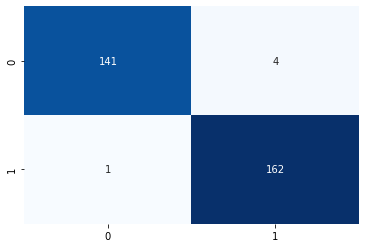

In [111]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [112]:
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

accuracy of the model:  0.9837662337662337


In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.98      0.99      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

